In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv('df_ufc_masters.csv')
df

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Southpaw,R_Stance_Switch,Winner_Blue,Winner_Red,better_rank_Blue,better_rank_Red,better_rank_neither
0,Thiago Santos,Johnny Walker,0.600000,0.434783,66.666667,130.000000,02-10-2021,"Las Vegas, Nevada, USA",USA,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Alex Oliveira,Niko Price,0.370370,0.666667,170.000000,50.000000,02-10-2021,"Las Vegas, Nevada, USA",USA,Blue,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Misha Cirkunov,Krzysztof Jotko,0.476190,0.565217,110.000000,76.923077,02-10-2021,"Las Vegas, Nevada, USA",USA,Blue,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,Alexander Hernandez,Mike Breeden,0.870968,0.173913,14.814815,475.000000,02-10-2021,"Las Vegas, Nevada, USA",USA,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Joe Solecki,Jared Gordon,0.574468,0.465116,74.074074,115.000000,02-10-2021,"Las Vegas, Nevada, USA",USA,Blue,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,Duane Ludwig,Darren Elkins,0.607843,0.425532,64.516129,135.000000,21-03-2010,"Broomfield, Colorado, USA",USA,Blue,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4890,John Howard,Daniel Roberts,0.677419,0.363636,47.619048,175.000000,21-03-2010,"Broomfield, Colorado, USA",USA,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4891,Brendan Schaub,Chase Gormley,0.722222,0.312500,38.461538,220.000000,21-03-2010,"Broomfield, Colorado, USA",USA,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4892,Mike Pierce,Julio Paulino,0.807692,0.229885,23.809524,335.000000,21-03-2010,"Broomfield, Colorado, USA",USA,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [89]:
df.filter(regex='^B')

,B_fighter,B_odds,B_ev,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_landed,...,B_Height_cms,B_Reach_cms,B_Weight_lbs,B_age,B_match_weightclass_rank,B_Pound-for-Pound_rank,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Southpaw,B_Stance_Switch
0,Johnny Walker,0.434783,130.000000,0,1,0,3.420000,0.59,0.700000,0.240000,...,198.12,208.28,205,29,10.0,NaN,0.0,1.0,0.0,0.0
1,Niko Price,0.666667,50.000000,2,0,0,5.160000,0.42,0.800000,0.790000,...,182.88,193.04,170,32,NaN,NaN,0.0,1.0,0.0,0.0
2,Krzysztof Jotko,0.565217,76.923077,1,0,0,2.920000,0.41,0.100000,1.150000,...,185.42,195.58,185,32,NaN,NaN,0.0,0.0,1.0,0.0
3,Mike Breeden,0.173913,475.000000,1,0,0,4.040000,0.34,0.000000,0.000000,...,177.80,177.80,155,32,NaN,NaN,0.0,1.0,0.0,0.0
4,Jared Gordon,0.465116,115.000000,0,2,0,5.220000,0.56,0.000000,2.540000,...,175.26,172.72,145,33,NaN,NaN,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,Darren Elkins,0.425532,135.000000,0,0,0,0.000000,0.00,0.000000,0.000000,...,177.80,180.34,145,25,NaN,NaN,0.0,1.0,0.0,0.0
4890,Daniel Roberts,0.363636,175.000000,0,0,0,0.000000,0.00,0.000000,0.000000,...,177.80,187.96,170,29,NaN,NaN,0.0,0.0,1.0,0.0
4891,Chase Gormley,0.312500,220.000000,1,0,0,8.000000,0.34,1.000000,1.000000,...,190.50,196.00,265,27,NaN,NaN,0.0,1.0,0.0,0.0
4892,Julio Paulino,0.229885,335.000000,0,0,0,0.000000,0.00,0.000000,0.000000,...,182.88,185.42,170,34,NaN,NaN,0.0,1.0,0.0,0.0


array([[<Axes: title={'center': 'B_Height_cms'}>,
        <Axes: title={'center': 'B_Reach_cms'}>],
       [<Axes: title={'center': 'B_age'}>,
        <Axes: title={'center': 'B_current_lose_streak'}>],
       [<Axes: title={'center': 'B_current_win_streak'}>, <Axes: >]],
      dtype=object)

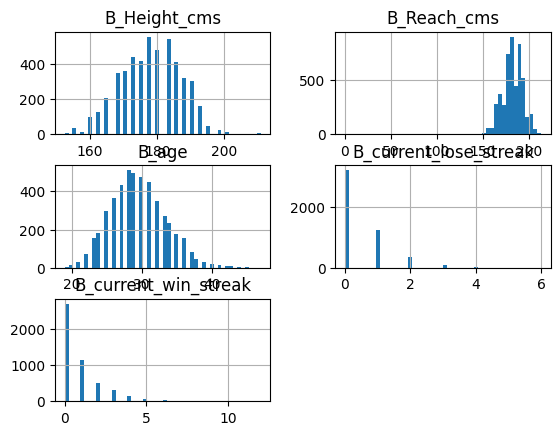

In [90]:
columns = ['B_Height_cms', 'B_Reach_cms', 'B_age', 'B_current_lose_streak', 'B_current_win_streak']
df[columns].hist(bins=50)

In [91]:
features_min_max_sc = ['B_Height_cms', 'B_Reach_cms', 'B_age', 'R_Height_cms', 'R_Reach_cms', 'R_age']

minmax_sc = MinMaxScaler()
minmax_sc.fit(df[features_min_max_sc])
df[['B_Height_mm', 'B_Reach_mm', 'B_age_mm', 'R_Height_mm', 'R_Reach_mm', 'R_age_mm']] = minmax_sc.transform(df[features_min_max_sc])

array([[<Axes: title={'center': 'B_Height_mm'}>,
        <Axes: title={'center': 'B_Reach_mm'}>],
       [<Axes: title={'center': 'B_age_mm'}>, <Axes: >]], dtype=object)

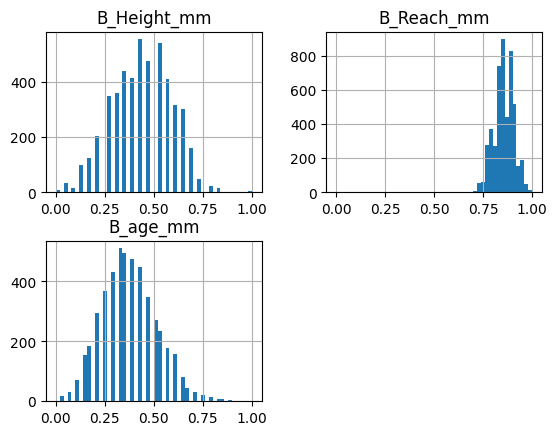

In [92]:
columns = ['B_Height_mm', 'B_Reach_mm', 'B_age_mm']
df[columns].hist(bins=50)

In [93]:
features_names = ['B_Height_mm', 'B_Reach_mm', 'B_age_mm', 'B_current_lose_streak', 'B_current_win_streak',
                  'R_Height_mm', 'R_Reach_mm', 'R_age_mm', 'R_current_lose_streak', 'R_current_win_streak',
    'B_avg_SIG_STR_landed',
    'B_avg_SIG_STR_pct',
    'B_avg_SUB_ATT',
    'B_avg_TD_landed',
    'B_avg_TD_pct',
    'R_avg_SIG_STR_landed',
    'R_avg_SIG_STR_pct',
    'R_avg_SUB_ATT',
    'R_avg_TD_landed',
    'R_avg_TD_pct']

X = np.c_[df[features_names]]
y = np.c_[df['Winner_Blue']]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [95]:
model_lin = LogisticRegression()
model_lin.fit(X_train, y_train.reshape(-1))

C:\Users\AleksanderHalfstadAa\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [96]:
y_pred_train = model_lin.predict(X_train)
y_pred_test = model_lin.predict(X_test)

Train accuracy: 0.6081736909323117
Train precsision: 0.5655172413793104
Train recall: 0.29854368932038833


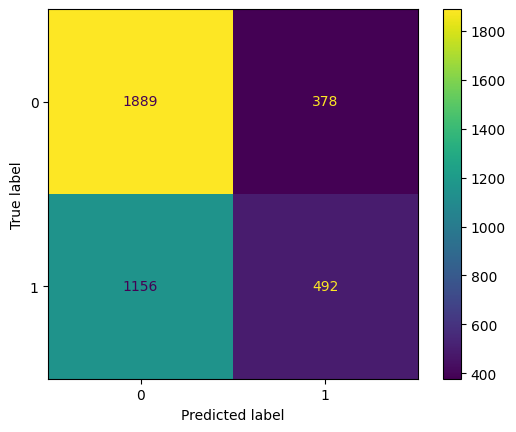

In [97]:
acc_train = accuracy_score(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
ConfusionMatrixDisplay(cm_train).plot()
tn = cm_train[0,0]
fp = cm_train[0,1]
fn = cm_train[1,0]
tp = cm_train[1,1]
precision = tp/(fp+tp)
recall = tp/(tp+fn)

print(f'Train accuracy: {acc_train}')
print(f'Train precsision: {precision}')
print(f'Train recall: {recall}')

Test accuracy: 0.6057201225740552
Test precsision: 0.5072463768115942
Test recall: 0.2699228791773779


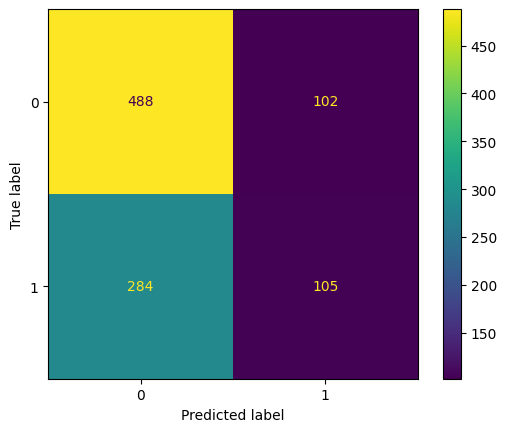

In [98]:
acc_test = accuracy_score(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(cm_test).plot()
tn = cm_test[0,0]
fp = cm_test[0,1]
fn = cm_test[1,0]
tp = cm_test[1,1]
precision_test = tp/(fp+tp)
recall_test = tp/(tp+fn)

print(f'Test accuracy: {acc_test}')
print(f'Test precsision: {precision_test}')
print(f'Test recall: {recall_test}')